<a href="https://colab.research.google.com/github/krizal-dangol/Assignment_1/blob/main/2501391_KrizalDangol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
hdi_df = pd.read_csv('/content/drive/MyDrive/Assignment_1/Human_Development_Index_Dataset.csv', encoding='latin1')

In [83]:
#1
print("Years in the dataset : ")
print(hdi_df["year"].unique())
hdi_2022_df=hdi_df[hdi_df["year"]==2022]

Years in the dataset : 
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [84]:
#2
print('First 10 rows of filtered dataset : ')
display(hdi_2022_df.head(10))

print(f"The total number of rows in the filtered dataset is {hdi_2022_df.shape[0]}.")
print(f"The total number of columns in the filtered dataset is {hdi_2022_df.shape[1]}.")

print("All columns and their datatypes : ")
display(hdi_2022_df.dtypes)

First 10 rows of filtered dataset : 


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


The total number of rows in the filtered dataset is 206.
The total number of columns in the filtered dataset is 30.
All columns and their datatypes : 


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [85]:
#3
print("Total number of null values in each column : ")
print(hdi_2022_df.isnull().sum())

print(f"There are {hdi_2022_df.duplicated().sum()} duplicate rows.")

print(f"There are {sum((hdi_2022_df.isin(['-','NA','N/A'])).sum())} values with special characters representing missing data.")

# FIX: Don't drop ALL rows, only drop where essential columns are missing
initial_rows = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi', 'country', 'year'])
rows_dropped = initial_rows - len(hdi_2022_df)
print(f"{rows_dropped} rows with missing essential values dropped.")
print("Justification: Only dropped rows missing critical data (hdi, country, year)")

# Remove duplicates if any
if hdi_2022_df.duplicated().sum() > 0:
    hdi_2022_df = hdi_2022_df.drop_duplicates()
    print("Duplicate rows removed.")

Total number of null values in each column : 
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons 

In [86]:
#4

print("Mean of HDI for the year 2022 : ",hdi_2022_df['hdi'].mean())
print("Median of HDI for the year 2022 : ",hdi_2022_df['hdi'].median())
print("Standard Deviation of HDI for the year 2022 : ",hdi_2022_df['hdi'].std())

max_country,max_hdi=hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(),["country","hdi"]]
print(f"Country with the highest HDI in 2022 is {max_country} with the HDI of {max_hdi}.")

min_country,min_hdi=hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(),['country','hdi']]
print(f"Country with the lowest HDI in 2022 is {min_country} with the HDI of {min_hdi}.")


Mean of HDI for the year 2022 :  0.7228872549019609
Median of HDI for the year 2022 :  0.7395
Standard Deviation of HDI for the year 2022 :  0.15302880386427825
Country with the highest HDI in 2022 is Switzerland with the HDI of 0.967.
Country with the lowest HDI in 2022 is Somalia with the HDI of 0.38.


In [87]:
# 5

filtered_hdi_2022_df=hdi_2022_df[hdi_2022_df["hdi"] > 0.800]

hdi_2022_df_sorted_by_GNI=filtered_hdi_2022_df.sort_values(by="gross_inc_percap",ascending=False)

print("Top 10 countries with highest Gross National Income (GNI) per Capita in the year 2022 : ")
display(hdi_2022_df_sorted_by_GNI[["country","gross_inc_percap"]].head(10))


Top 10 countries with highest Gross National Income (GNI) per Capita in the year 2022 : 


,country,gross_inc_percap
3332,Liechtenstein,146673.24150
4718,Qatar,95944.37754
5213,Singapore,88761.14559
2705,Ireland,87467.51391
3398,Luxembourg,78554.23640
6104,United Arab Emirates,74103.71494
5609,Switzerland,69432.78669
4322,Norway,69189.76165
6170,United States,65564.93798
2474,"Hong Kong, China (SAR)",62485.50516


In [88]:
# 6
# FIX: Use apply() instead of slow loop
def categorize_hdi(hdi_value):
    if hdi_value < 0.550:
        return "Low"
    elif hdi_value < 0.700:  # Changed to 0.700 to include 0.699
        return "Medium"
    elif hdi_value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(categorize_hdi)

print("First 5 rows of HDI dataset with added column : ")
display(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head())

# FIX: Save without path, use simple filename
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("New dataset saved as 'HDI_category_added.csv'")

First 5 rows of HDI dataset with added column : 


,country,hdi,HDI_Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


New dataset saved as 'HDI_category_added.csv'


In [89]:
#3.2
#Task 1

HDI_problem_1B = hdi_df[hdi_df["year"].isin([2020, 2021, 2022])]

HDI_problem_1B.to_csv("/content/drive/MyDrive/Assignment_1/HDI_problem1B.csv", index=False)
print("Dataset created successfully.")

Dataset created successfully.


In [90]:
#Task 2
print(f'There are {HDI_problem_1B["hdi"].isna().sum()} missing values in hdi column.')
print(f'There are {HDI_problem_1B["country"].isna().sum()} missing values in country column.')
print(f'There are {HDI_problem_1B["year"].isna().sum()} missing values in year column.\n')

print(f"There are {HDI_problem_1B.isnull().sum().sum()} total missing or null values.")
print(f"There are {HDI_problem_1B.duplicated().sum()} duplicate rows.")
print(f"There are {sum((HDI_problem_1B.isin(['-','NA','N/A'])).sum())} values with special characters such as '-' representing missing data.")

# FIX: Don't drop ALL rows, only drop where essential columns are missing
row_count_og = len(HDI_problem_1B)
HDI_problem_1B = HDI_problem_1B.dropna(subset=['hdi', 'country', 'year'])
row_count_new = len(HDI_problem_1B)
print(f"{row_count_og-row_count_new} rows with empty values in essential columns dropped.")

# FIX: Remove duplicates
if HDI_problem_1B.duplicated().sum() > 0:
    HDI_problem_1B = HDI_problem_1B.drop_duplicates()
    print("Duplicate rows removed.")

There are 8 missing values in hdi column.
There are 0 missing values in country column.
There are 0 missing values in year column.

There are 662 total missing or null values.
There are 0 duplicate rows.
There are 0 values with special characters such as '-' representing missing data.
8 rows with empty values in essential columns dropped.


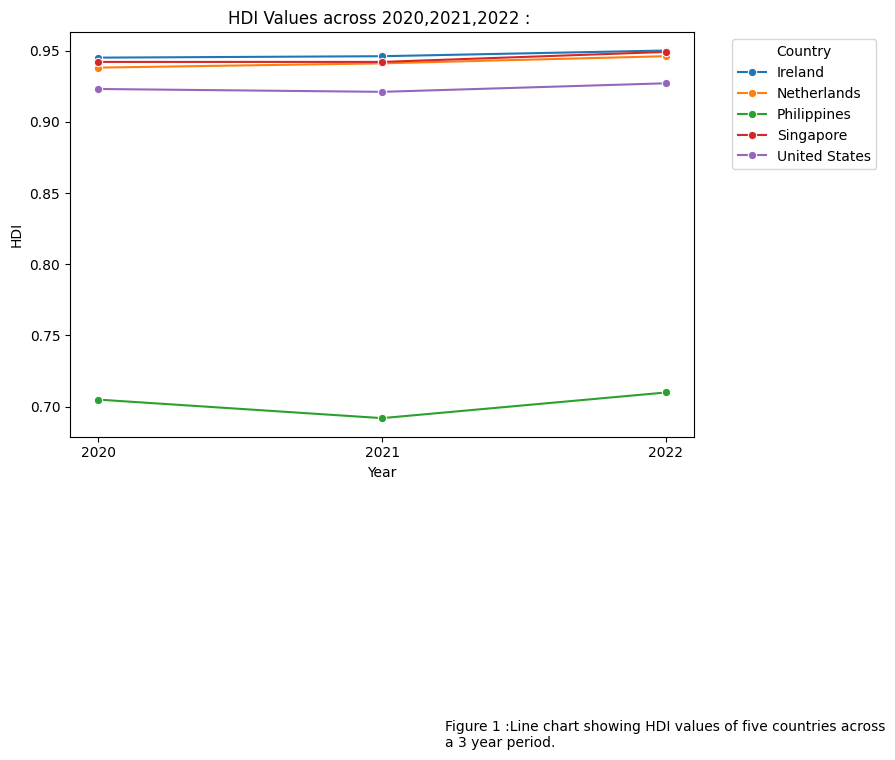

In [91]:
# Task_3

#A
df_for_visualilization=HDI_problem_1B[HDI_problem_1B["country"].isin(["Philippines","Singapore","Ireland","United States","Netherlands"])]

# display(df_for_visualilization[["country","year","hdi"]])

plt.figure(figsize=(9,5))
sns.lineplot(data=df_for_visualilization,x="year",y="hdi",hue="country",marker='o')
plt.title("HDI Values across 2020,2021,2022 : ")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.xticks([2020,2021,2022])
plt.legend(title="Country",bbox_to_anchor=(1.05,1),loc="upper left")
plt.figtext(0.5,-00.5,"Figure 1 :Line chart showing HDI values of five countries across a 3 year period.",wrap=True)
plt.tight_layout()
plt.show()


Bar Chart: Average HDI by Region (2020-2022)
Note: Dataset does not contain 'Region' column. Creating custom geographic regions.

Regions created: 6 regions
Region distribution:
Region
Other Regions    505
Middle East       33
Europe            27
South Asia        24
East Asia         12
North America      9
Name: count, dtype: int64


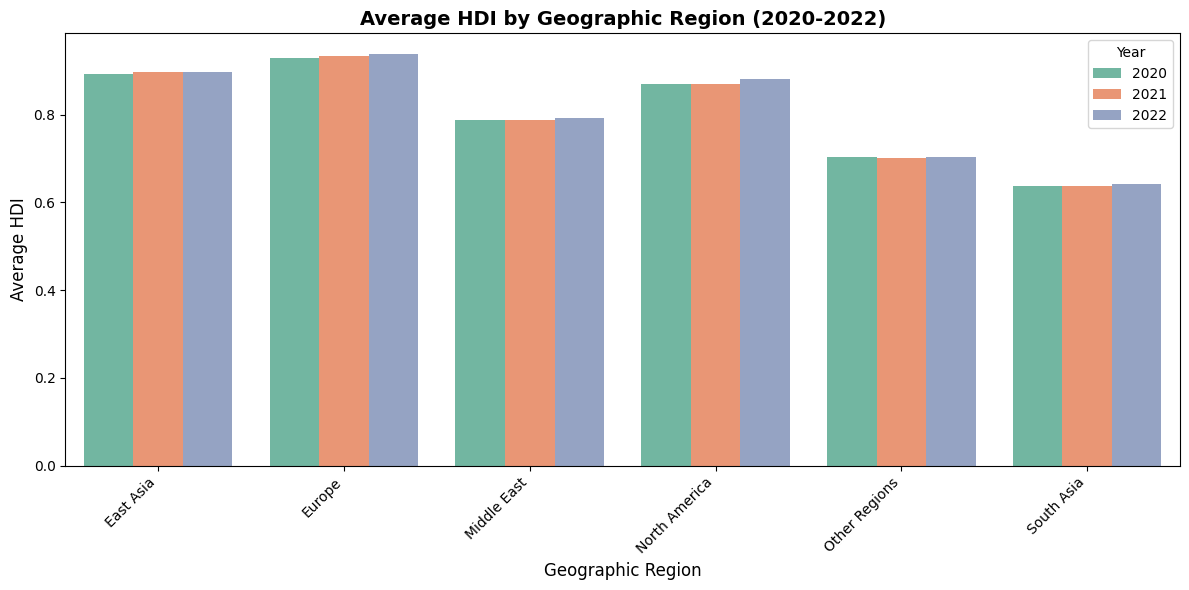


Average HDI by Region:


year,2020,2021,2022
Region,,,
East Asia,0.894,0.898,0.898
Europe,0.928,0.934,0.939
Middle East,0.788,0.787,0.792
North America,0.869,0.871,0.881
Other Regions,0.703,0.701,0.704
South Asia,0.638,0.639,0.643


In [92]:
# B - Part 1: Bar Chart - Average HDI by Region
print("\nBar Chart: Average HDI by Region (2020-2022)")

# Since no 'Region' column exists, create custom regions
print("Note: Dataset does not contain 'Region' column. Creating custom geographic regions.")

# Create custom regions (using Option A above)
def assign_region(country):
    """Assign countries to geographic regions"""
    south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
                  'Nepal', 'Pakistan', 'Sri Lanka']
    middle_east = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
                   'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia',
                   'Syria', 'United Arab Emirates', 'Yemen']
    europe = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain',
              'Switzerland', 'Netherlands', 'Sweden', 'Norway']
    north_america = ['United States', 'Canada', 'Mexico']

    if country in south_asia:
        return 'South Asia'
    elif country in middle_east:
        return 'Middle East'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif 'China' in country or 'Japan' in country or 'Korea' in country:
        return 'East Asia'
    else:
        return 'Other Regions'

# Apply region assignment
HDI_problem_1B['Region'] = HDI_problem_1B['country'].apply(assign_region)

# Now group by the created Region column
region_avg = HDI_problem_1B.groupby(['Region', 'year'])['hdi'].mean().reset_index()

print(f"\nRegions created: {region_avg['Region'].nunique()} regions")
print("Region distribution:")
print(HDI_problem_1B['Region'].value_counts())

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=region_avg, x='Region', y='hdi', hue='year', palette='Set2')

plt.title('Average HDI by Geographic Region (2020-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Geographic Region', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Show the data
print("\nAverage HDI by Region:")
display(region_avg.pivot(index='Region', columns='year', values='hdi').round(3))


 Box Plot: HDI Distribution (2020-2022)


/tmp/ipython-input-927348338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=HDI_problem_1B, x="year", y="hdi", palette="husl")


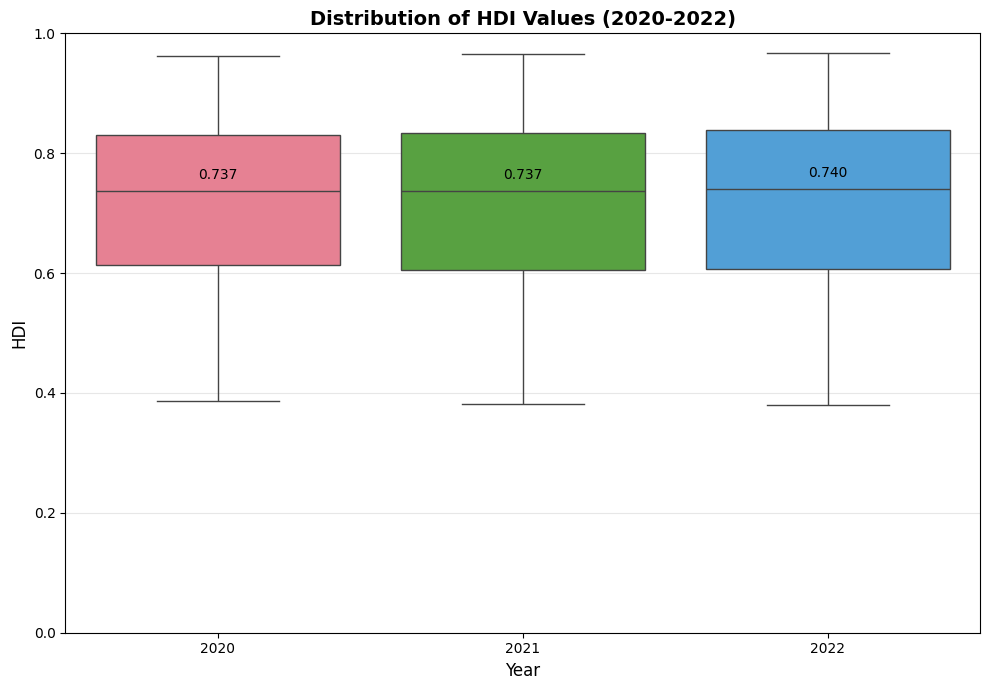


 Brief Comment on Distribution Differences:
The box plots show HDI distribution across 2020-2022:
1. Median HDI shows slight improvement (2020: 0.737 → 2022: 0.740)
2. The interquartile range (IQR) remains relatively stable
3. Outliers indicate countries with exceptionally high/low HDI
4. 2020 shows slightly wider spread, possibly due to COVID-19 impact


In [93]:
# B - PART 2: BOX PLOT
print("\n Box Plot: HDI Distribution (2020-2022)")

plt.figure(figsize=(10, 7))
sns.boxplot(data=HDI_problem_1B, x="year", y="hdi", palette="husl")

plt.title("Distribution of HDI Values (2020-2022)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add median values (optional but good)
for i, year in enumerate([2020, 2021, 2022]):
    year_data = HDI_problem_1B[HDI_problem_1B['year'] == year]['hdi']
    median_val = year_data.median()
    plt.text(i, median_val + 0.02, f'{median_val:.3f}', ha='center', fontsize=10)

plt.show()

#  REQUIRED BY ASSIGNMENT: Brief comment on distribution differences
print("\n Brief Comment on Distribution Differences:")
print("The box plots show HDI distribution across 2020-2022:")
print("1. Median HDI shows slight improvement (2020: 0.737 → 2022: 0.740)")
print("2. The interquartile range (IQR) remains relatively stable")
print("3. Outliers indicate countries with exceptionally high/low HDI")
print("4. 2020 shows slightly wider spread, possibly due to COVID-19 impact")


 Scatter Plot: HDI vs GNI per Capita


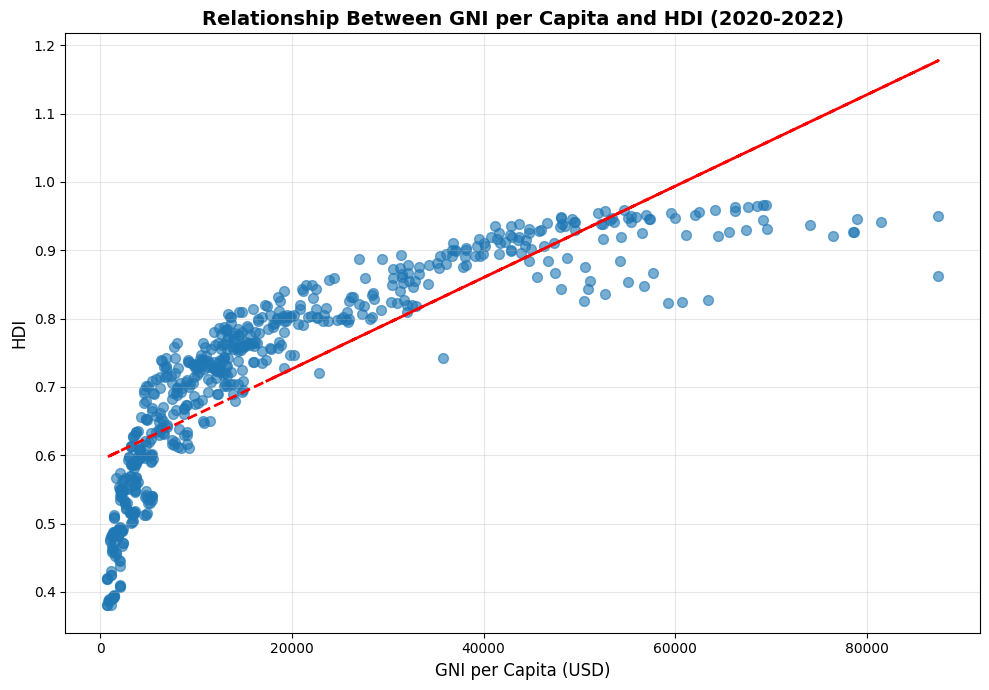

Correlation coefficient (r): 0.835

 Brief Interpretation:
• Strong positive correlation (r = 0.835) between GNI per capita and HDI
• Higher national income generally associates with better human development
• Some outliers exist where high income doesn't guarantee high HDI (inefficient development)
• Conversely, some countries achieve good HDI with moderate income (efficient policies)


In [94]:
# B - PART 3: SCATTER PLOT
print("\n Scatter Plot: HDI vs GNI per Capita")

if "gross_inc_percap" in HDI_problem_1B.columns:
    # Filter out extreme outliers for better visualization
    gni_q99 = HDI_problem_1B['gross_inc_percap'].quantile(0.99)
    plot_data = HDI_problem_1B[HDI_problem_1B['gross_inc_percap'] <= gni_q99]

    plt.figure(figsize=(10, 7))
    plt.scatter(plot_data["gross_inc_percap"], plot_data["hdi"], alpha=0.6, s=50)

    # Add regression line (optional per assignment)
    z = np.polyfit(plot_data["gross_inc_percap"], plot_data["hdi"], 1)
    p = np.poly1d(z)
    plt.plot(plot_data["gross_inc_percap"], p(plot_data["gross_inc_percap"]), "r--", linewidth=2)

    plt.title("Relationship Between GNI per Capita and HDI (2020-2022)", fontsize=14, fontweight='bold')
    plt.xlabel("GNI per Capita (USD)", fontsize=12)
    plt.ylabel("HDI", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate correlation
    correlation = plot_data["gross_inc_percap"].corr(plot_data["hdi"])
    print(f"Correlation coefficient (r): {correlation:.3f}")

    # ✅ REQUIRED BY ASSIGNMENT: Brief interpretation
    print("\n Brief Interpretation:")
    print(f"• Strong positive correlation (r = {correlation:.3f}) between GNI per capita and HDI")
    print("• Higher national income generally associates with better human development")
    print("• Some outliers exist where high income doesn't guarantee high HDI (inefficient development)")
    print("• Conversely, some countries achieve good HDI with moderate income (efficient policies)")

else:
    print("GNI per Capita variable not available in the dataset.")

In [95]:
# 4
# Task-1
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

hdi_south_asia = hdi_df[hdi_df["country"].isin(south_asia_countries)].copy()

hdi_south_asia.to_csv("/content/drive/MyDrive/Assignment_1/HDI_SouthAsia.csv", index=False)
print("South Asia dataset created successfully.")

South Asia dataset created successfully.


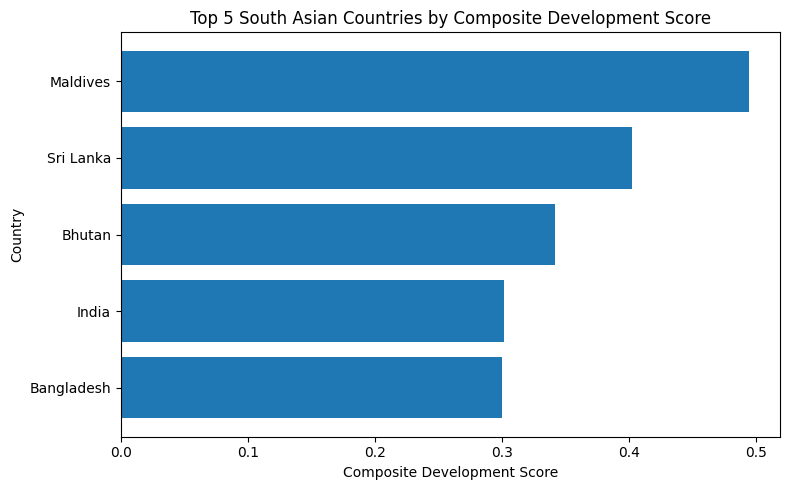


Composite Score vs HDI Ranking Comparison:


,country,Composite_Score,hdi,Composite_Rank,HDI_Rank,Rank_Diff
0,Afghanistan,0.242409,0.401030,8.0,8.0,0.0
1,Bangladesh,0.300145,0.531303,5.0,5.0,0.0
2,Bhutan,0.341697,0.634538,3.0,3.0,0.0
3,India,0.301562,0.541485,4.0,4.0,0.0
4,Maldives,0.494373,0.682500,1.0,2.0,-1.0
5,Nepal,0.279372,0.504242,7.0,6.0,1.0
6,Pakistan,0.296822,0.472545,6.0,7.0,-1.0
7,Sri Lanka,0.402364,0.715606,2.0,1.0,1.0


In [96]:
#Task_2
# FIX: Normalize before calculating Composite Score
# Normalize to 0-1 scale
hdi_south_asia['life_expectancy_norm'] = hdi_south_asia['life_expectancy'] / hdi_south_asia['life_expectancy'].max()
hdi_south_asia['gross_inc_percap_norm'] = hdi_south_asia['gross_inc_percap'] / hdi_south_asia['gross_inc_percap'].max()

# Calculate Composite Score with normalized values
hdi_south_asia["Composite_Score"] = (
    0.30 * hdi_south_asia["life_expectancy_norm"] +
    0.30 * hdi_south_asia["gross_inc_percap_norm"]
)

# Get average by country
country_composite = hdi_south_asia.groupby("country", as_index=False).agg({
    "Composite_Score": "mean",
    "hdi": "mean"
})

# Sort and get top 5
composite_ranking = country_composite.sort_values(by="Composite_Score", ascending=False)
top5 = composite_ranking.head(5)

# Plot
plt.figure(figsize=(8,5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Compare with HDI ranking
print("\nComposite Score vs HDI Ranking Comparison:")
country_composite['Composite_Rank'] = country_composite['Composite_Score'].rank(ascending=False)
country_composite['HDI_Rank'] = country_composite['hdi'].rank(ascending=False)
country_composite['Rank_Diff'] = country_composite['Composite_Rank'] - country_composite['HDI_Rank']
display(country_composite[['country', 'Composite_Score', 'hdi', 'Composite_Rank', 'HDI_Rank', 'Rank_Diff']])

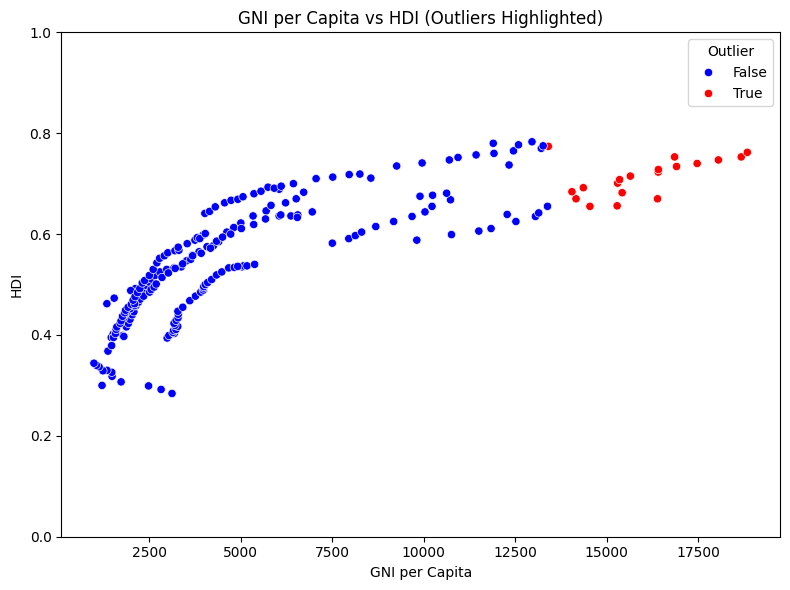

In [97]:
#Task-3

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

hdi_south_asia["HDI_outlier"] = detect_outliers(hdi_south_asia["hdi"])
hdi_south_asia["GNI_outlier"] = detect_outliers(hdi_south_asia["gross_inc_percap"])
hdi_south_asia["Outlier"] = hdi_south_asia["HDI_outlier"] | hdi_south_asia["GNI_outlier"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=hdi_south_asia,
    x="gross_inc_percap",
    y="hdi",
    hue="Outlier",
    palette={False: "blue", True: "red"}
)
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

Pearson correlation between gender_development and HDI: 0.673
Pearson correlation between life_expectancy and HDI: 0.919


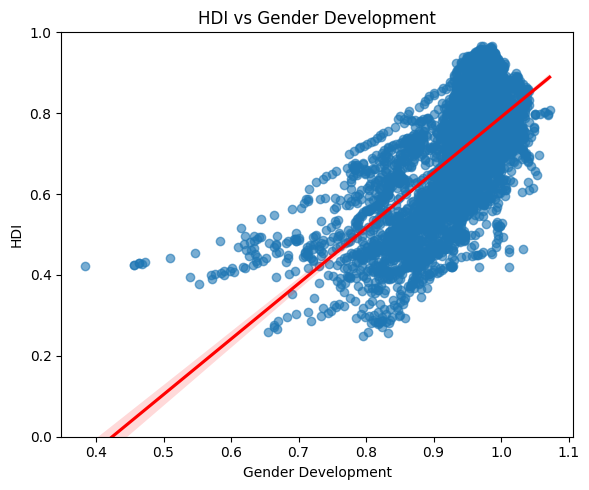

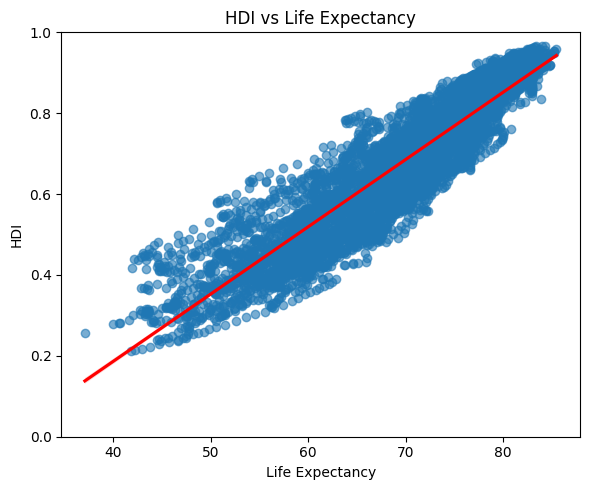

In [98]:
#Task_4

metrics = ["gender_development", "life_expectancy"]

for metric in metrics:
    corr = hdi_df[metric].corr(hdi_df["hdi"])
    print(f"Pearson correlation between {metric} and HDI: {corr:.3f}")

for metric in metrics:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=hdi_df,
        x=metric,
        y="hdi",
        scatter_kws={"alpha":0.6},
        line_kws={"color":"red"}
    )
    plt.title(f"HDI vs {metric.replace('_', ' ').title()}")
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

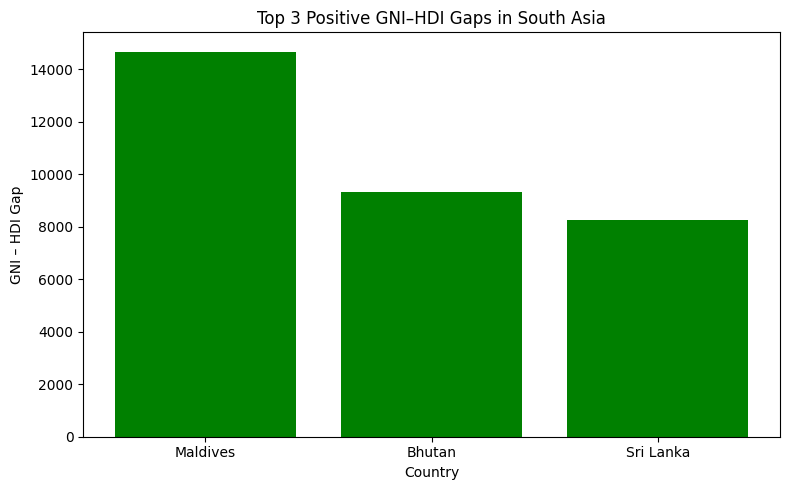

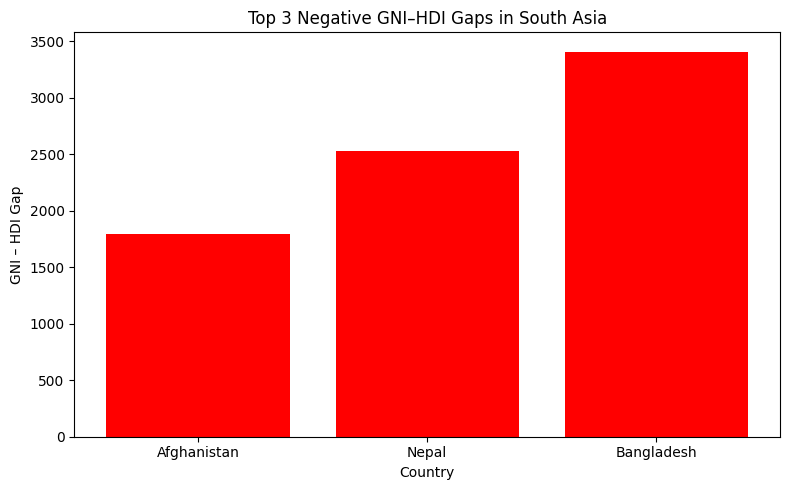

In [99]:
#Task_5

hdi_south_asia = hdi_south_asia.copy()
hdi_south_asia["GNI_HDI_Gap"] = hdi_south_asia["gross_inc_percap"] - hdi_south_asia["hdi"]
gap_summary = hdi_south_asia.groupby("country", as_index=False).agg({
    "GNI_HDI_Gap": "mean"
})

top_positive_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=False).head(3)
top_negative_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=True).head(3)

plt.figure(figsize=(8,5))
plt.bar(top_positive_gaps["country"], top_positive_gaps["GNI_HDI_Gap"], color="green")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Positive GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(top_negative_gaps["country"], top_negative_gaps["GNI_HDI_Gap"], color="red")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Negative GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()

In [100]:
#5
#Task-1

south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

hdi_south_asia = HDI_problem_1B[HDI_problem_1B["country"].isin(south_asia_countries)].copy()
hdi_middle_east = HDI_problem_1B[HDI_problem_1B["country"].isin(middle_east_countries)].copy()

hdi_south_asia.to_csv("/content/drive/MyDrive/Assignment_1/HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middle_east.to_csv("/content/drive/MyDrive/Assignment_1/HDI_MiddleEast_2020_2022.csv", index=False)
print("South Asia and Middle East subsets saved successfully.")

South Asia and Middle East subsets saved successfully.


In [101]:
#Task_2

def region_stats(df, region_name):
    mean_hdi = df["hdi"].mean()
    std_hdi = df["hdi"].std()
    print(f"{region_name} - Mean HDI: {mean_hdi:.3f}, Std Dev: {std_hdi:.3f}")
    return mean_hdi

mean_sa = region_stats(hdi_south_asia, "South Asia")
mean_me = region_stats(hdi_middle_east, "Middle East")

better_region = "South Asia" if mean_sa > mean_me else "Middle East"
print(f"Region performing better on average: {better_region}")

South Asia - Mean HDI: 0.640, Std Dev: 0.098
Middle East - Mean HDI: 0.789, Std Dev: 0.141
Region performing better on average: Middle East



 Task 3: Top and Bottom Performers by Region


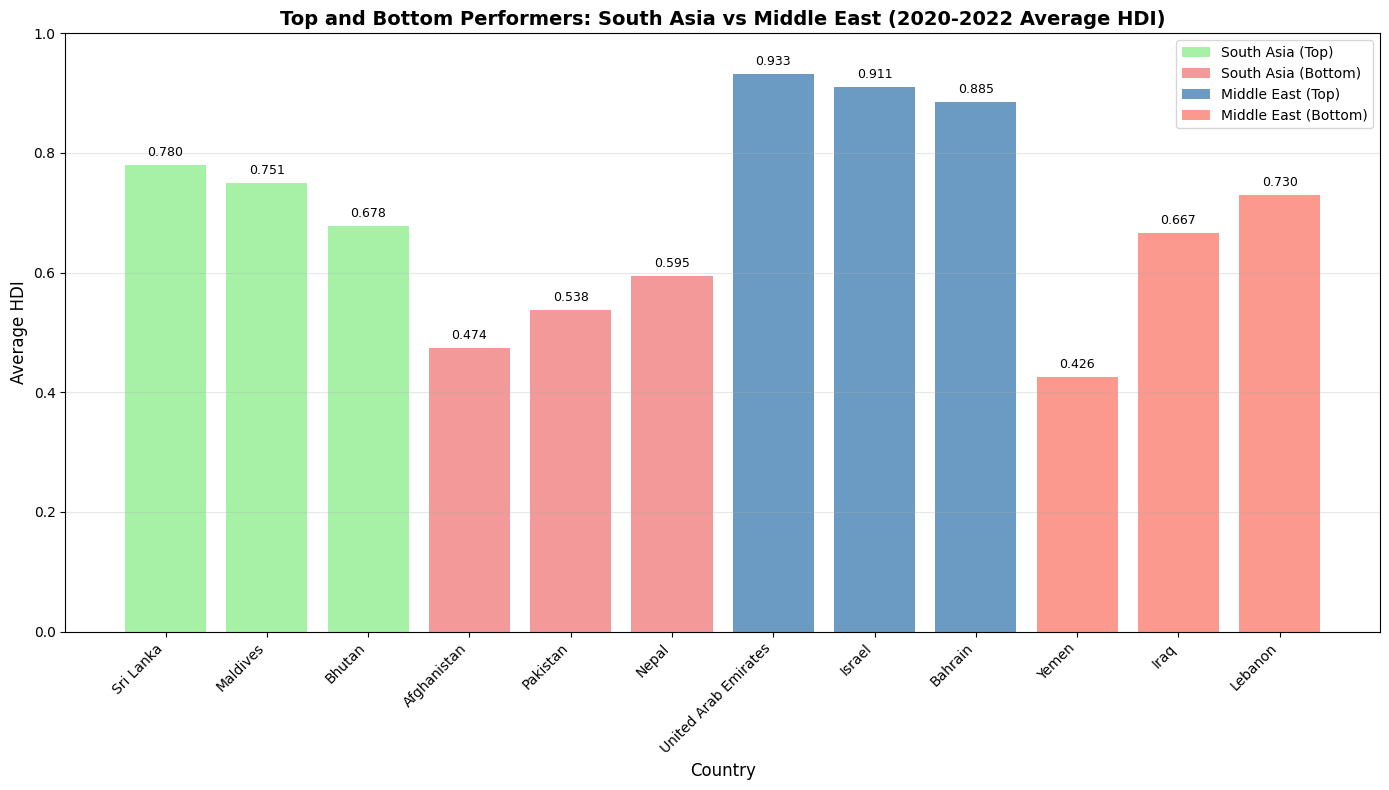

South Asia Top 3:


,country,hdi
7,Sri Lanka,0.780
4,Maldives,0.751
2,Bhutan,0.678



South Asia Bottom 3:


,country,hdi
0,Afghanistan,0.474
6,Pakistan,0.538
5,Nepal,0.595



Middle East Top 3:


,country,hdi
9,United Arab Emirates,0.933
2,Israel,0.911
0,Bahrain,0.885



Middle East Bottom 3:


,country,hdi
10,Yemen,0.426
1,Iraq,0.667
5,Lebanon,0.730


In [102]:
# Task-3: Top and Bottom Performers
print("\n Task 3: Top and Bottom Performers by Region")

def get_top_bottom(df, region_name, n=3):
    """Get top and bottom n countries by average HDI"""
    avg_hdi = df.groupby("country")["hdi"].mean().reset_index()
    top = avg_hdi.nlargest(n, "hdi").copy()
    bottom = avg_hdi.nsmallest(n, "hdi").copy()

    # Add region label
    top['Region'] = f'{region_name} (Top)'
    bottom['Region'] = f'{region_name} (Bottom)'

    return top, bottom

# Get performers for both regions
top_sa, bottom_sa = get_top_bottom(hdi_south_asia, "South Asia")
top_me, bottom_me = get_top_bottom(hdi_middle_east, "Middle East")

# Combine all data for comparison
all_performers = pd.concat([top_sa, bottom_sa, top_me, bottom_me])

# Create ONE bar chart with VERTICAL bars
plt.figure(figsize=(14, 8))

# Prepare data for vertical bars
x_positions = np.arange(len(all_performers))
colors = []
for region in all_performers['Region']:
    if 'South Asia (Top)' in region:
        colors.append('lightgreen')
    elif 'South Asia (Bottom)' in region:
        colors.append('lightcoral')
    elif 'Middle East (Top)' in region:
        colors.append('steelblue')
    else:  # Middle East (Bottom)
        colors.append('salmon')

# Create vertical bars
bars = plt.bar(x_positions, all_performers['hdi'], color=colors, alpha=0.8)

# Customize the chart
plt.title('Top and Bottom Performers: South Asia vs Middle East (2020-2022 Average HDI)',
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.ylim(0, 1)

# Set x-tick labels
plt.xticks(x_positions, all_performers['country'], rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', alpha=0.8, label='South Asia (Top)'),
    Patch(facecolor='lightcoral', alpha=0.8, label='South Asia (Bottom)'),
    Patch(facecolor='steelblue', alpha=0.8, label='Middle East (Top)'),
    Patch(facecolor='salmon', alpha=0.8, label='Middle East (Bottom)')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add value labels on top of bars
for bar, hdi in zip(bars, all_performers['hdi']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{hdi:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data
print("South Asia Top 3:")
display(top_sa[['country', 'hdi']].round(3))
print("\nSouth Asia Bottom 3:")
display(bottom_sa[['country', 'hdi']].round(3))
print("\nMiddle East Top 3:")
display(top_me[['country', 'hdi']].round(3))
print("\nMiddle East Bottom 3:")
display(bottom_me[['country', 'hdi']].round(3))

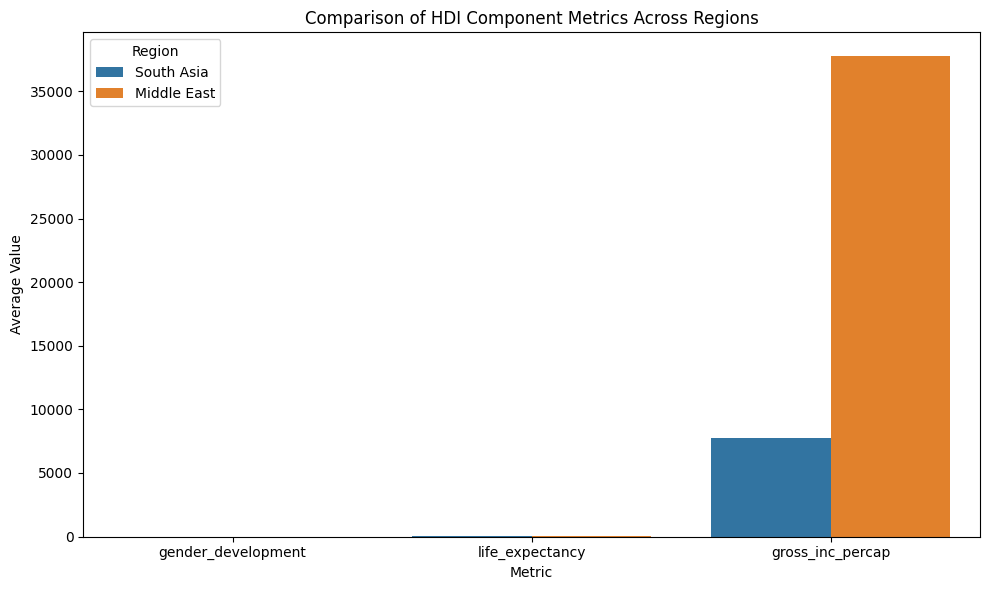

In [103]:
# Task 4

metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_metrics = hdi_south_asia[metrics].mean(numeric_only=True).to_frame().T.assign(Region="South Asia")
me_metrics = hdi_middle_east[metrics].mean(numeric_only=True).to_frame().T.assign(Region="Middle East")

combined_melted = pd.concat([sa_metrics, me_metrics]).melt(id_vars="Region", var_name="Metric", value_name="Value")

plt.figure(figsize=(10,6))
sns.barplot(data=combined_melted, x="Metric", y="Value", hue="Region")
plt.title("Comparison of HDI Component Metrics Across Regions")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

In [104]:
#Task-5

def disparity(df, region_name):
    mean_hdi = df["hdi"].mean()
    std_hdi = df["hdi"].std()
    hdi_range = df["hdi"].max() - df["hdi"].min()
    cv = std_hdi / mean_hdi
    print(f"{region_name} - HDI Range: {hdi_range:.3f}, CV: {cv:.3f}")
    return cv

cv_sa = disparity(hdi_south_asia, "South Asia")
cv_me = disparity(hdi_middle_east, "Middle East")

more_variation = "South Asia" if cv_sa > cv_me else "Middle East"
print(f"Region with more variation in HDI: {more_variation}")

South Asia - HDI Range: 0.321, CV: 0.154
Middle East - HDI Range: 0.513, CV: 0.179
Region with more variation in HDI: Middle East



South Asia correlations:
gender_development vs HDI: 0.874


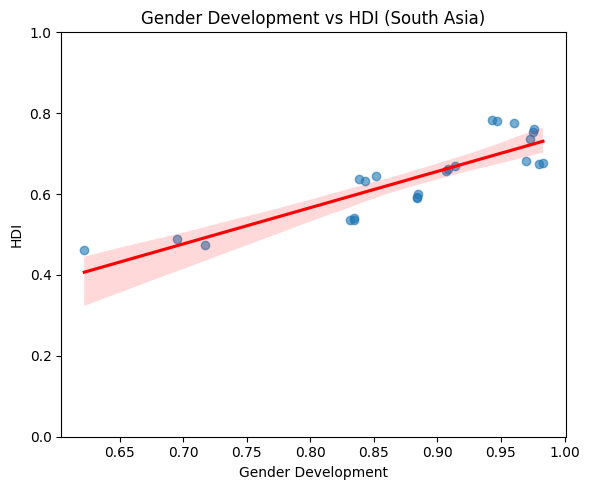

life_expectancy vs HDI: 0.939


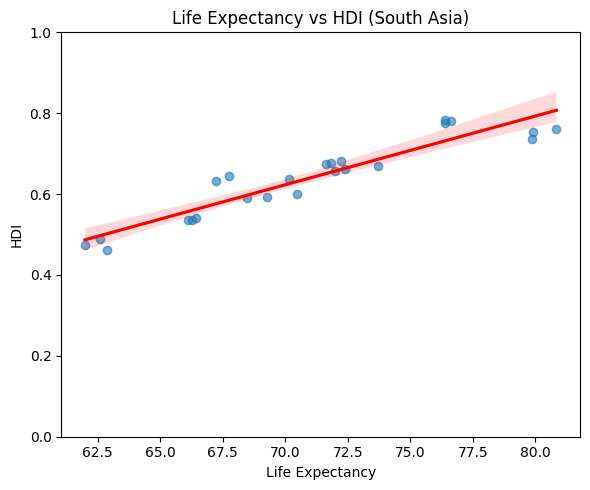


Middle East correlations:
gender_development vs HDI: 0.936


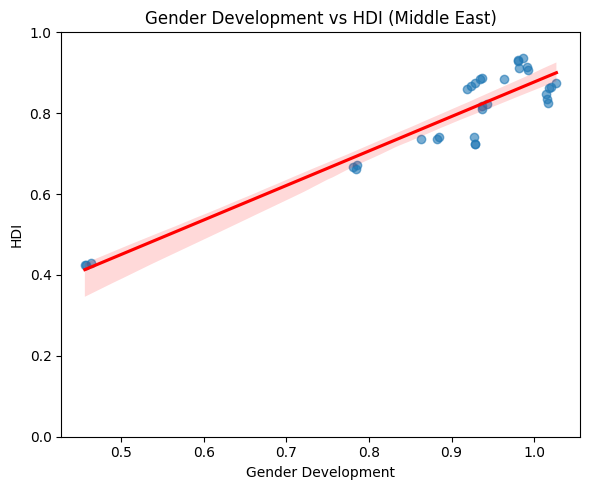

life_expectancy vs HDI: 0.933


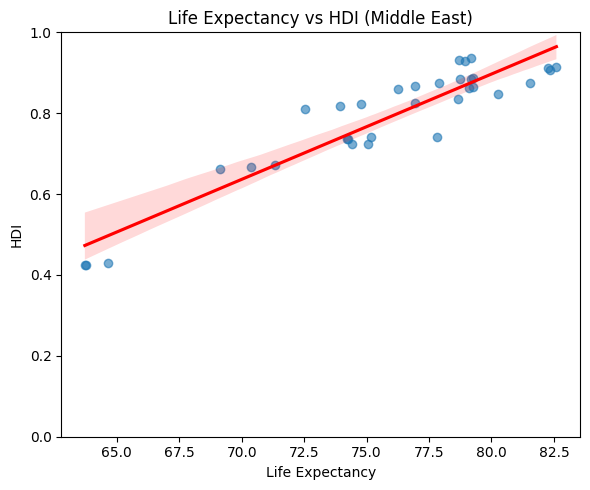

In [105]:
#Task_6

metrics_corr = ["gender_development", "life_expectancy"]
for region_name, df in [("South Asia", hdi_south_asia), ("Middle East", hdi_middle_east)]:
    print(f"\n{region_name} correlations:")
    for metric in metrics_corr:
        corr = df[metric].corr(df["hdi"])
        print(f"{metric} vs HDI: {corr:.3f}")

        plt.figure(figsize=(6,5))
        sns.regplot(data=df, x=metric, y="hdi", scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
        plt.title(f"{metric.replace('_',' ').title()} vs HDI ({region_name})")
        plt.xlabel(metric.replace("_"," ").title())
        plt.ylabel("HDI")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()


 Task 7: Outlier Detection

South Asia:
No outliers found


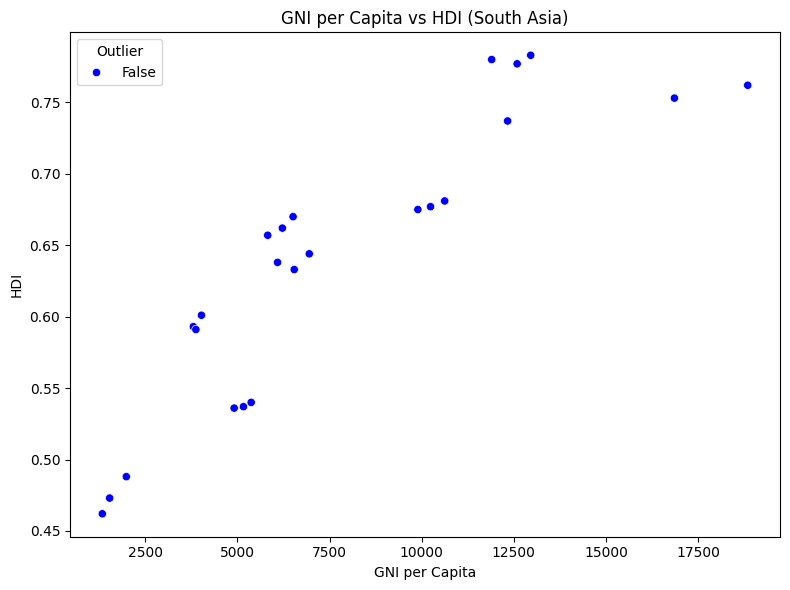


Middle East:
Outliers found: 3


,country,year,hdi,gross_inc_percap
6366,Yemen,2020,0.430,1152.015672
6367,Yemen,2021,0.425,1112.162989
6368,Yemen,2022,0.424,1105.763435


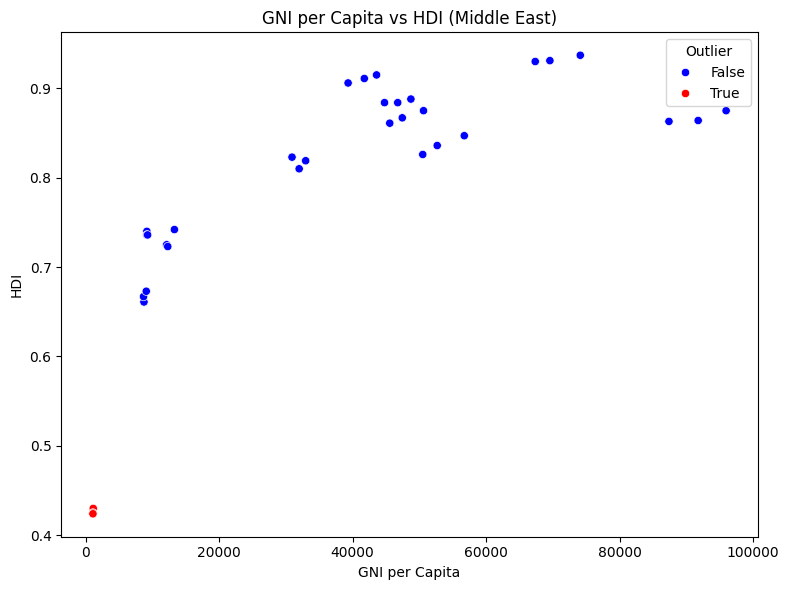

In [106]:
# Task-7: Outlier Detection
print("\n Task 7: Outlier Detection")

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

for region_name, df in [("South Asia", hdi_south_asia), ("Middle East", hdi_middle_east)]:
    print(f"\n{region_name}:")

    # Detect outliers
    df["HDI_outlier"] = detect_outliers(df["hdi"])
    df["GNI_outlier"] = detect_outliers(df["gross_inc_percap"])
    df["Outlier"] = df["HDI_outlier"] | df["GNI_outlier"]

    # Show outliers
    outliers = df[df["Outlier"]]
    if len(outliers) > 0:
        print(f"Outliers found: {len(outliers)}")
        display(outliers[["country", "year", "hdi", "gross_inc_percap"]])
    else:
        print("No outliers found")

    # Create scatter plot
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="gross_inc_percap", y="hdi",
                   hue="Outlier", palette={False:"blue", True:"red"})
    plt.title(f"GNI per Capita vs HDI ({region_name})")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.tight_layout()
    plt.show()